In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [107]:
df = pd.read_csv("bd-covid-19-owid.csv")

In [108]:
df.head(10)

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
0,3/3/20,NaN,NaN,NaN,NaN,108.0,108.0
1,4/3/20,NaN,NaN,NaN,NaN,3.0,111.0
2,5/3/20,NaN,NaN,NaN,NaN,NaN,NaN
3,6/3/20,NaN,NaN,NaN,NaN,9.0,120.0
4,7/3/20,NaN,NaN,NaN,NaN,7.0,127.0
5,8/3/20,3.0,3.0,NaN,NaN,10.0,137.0
6,9/3/20,3.0,0.0,NaN,NaN,10.0,147.0
7,10/3/20,3.0,0.0,NaN,NaN,16.0,163.0
8,11/3/20,3.0,0.0,NaN,NaN,24.0,187.0
9,12/3/20,3.0,0.0,NaN,NaN,24.0,211.0


In [112]:
df.tail(10)

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
440,17/5/21,780857.0,698.0,12181.0,32.0,10347.0,5707660.0
441,18/5/21,782129.0,1272.0,12211.0,30.0,16855.0,5724515.0
442,19/5/21,783737.0,1608.0,12248.0,37.0,20528.0,5745043.0
443,20/5/21,785194.0,1457.0,12284.0,36.0,19437.0,5764480.0
444,21/5/21,786698.0,1504.0,12310.0,26.0,18294.0,5782774.0
445,22/5/21,787726.0,1028.0,12348.0,38.0,12230.0,5795004.0
446,23/5/21,789080.0,1354.0,12376.0,28.0,15205.0,5810209.0
447,24/5/21,790521.0,1441.0,12401.0,25.0,17683.0,5827892.0
448,25/5/21,792196.0,1675.0,12441.0,40.0,16624.0,5844516.0
449,26/5/21,793693.0,1497.0,12458.0,17.0,16434.0,5860950.0


In [113]:
"""
Some descriptive Statistics from data pre-processing
"""
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
count,445.000000,445.000000,435.000000,435.000000,448.000000,4.480000e+02
mean,357541.791011,1783.579775,5360.227586,28.639080,13082.477679,2.307214e+06
std,240476.941246,1410.735792,3616.409642,20.183395,6631.388337,1.778244e+06
min,3.000000,0.000000,1.000000,0.000000,3.000000,1.080000e+02
25%,133978.000000,692.000000,2024.500000,15.000000,10979.750000,6.769062e+05
50%,386086.000000,1541.000000,5723.000000,26.000000,13504.000000,2.122463e+06
75%,537030.000000,2525.000000,8197.500000,38.000000,15641.250000,3.694792e+06
max,793693.000000,7626.000000,12458.000000,112.000000,34968.000000,5.860950e+06


In [114]:
df.isnull().sum()

date             0
total_cases      5
new_cases        5
total_deaths    15
new_deaths      15
new_tests        2
total_tests      2
dtype: int64

In [116]:
# I used the mean of the data to fill in the place of missing data
for c in df.columns[1::]:
    df.fillna(df[c].mean(), inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          450 non-null    object 
 1   total_cases   450 non-null    float64
 2   new_cases     450 non-null    float64
 3   total_deaths  450 non-null    float64
 4   new_deaths    450 non-null    float64
 5   new_tests     450 non-null    float64
 6   total_tests   450 non-null    float64
dtypes: float64(6), object(1)
memory usage: 24.7+ KB


In [138]:
"""
Some descriptive Statistics from data after-processing
"""
df.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
count,450,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02
mean,2020-10-19 14:14:23.999999744,357541.791011,5736.448789,17099.613034,11945.744145,14613.407960,2.298548e+06
min,2020-01-04 00:00:00,3.000000,0.000000,1.000000,0.000000,3.000000,1.080000e+02
25%,2020-06-11 06:00:00,138790.500000,697.250000,2207.250000,15.000000,10998.000000,6.510822e+05
50%,2020-10-09 12:00:00,382117.000000,1545.500000,5873.500000,27.000000,13520.500000,2.108206e+06
75%,2021-02-16 18:00:00,536435.500000,2573.500000,8325.250000,39.000000,15671.250000,3.687228e+06
max,2021-12-05 00:00:00,793693.000000,357541.791011,357541.791011,357541.791011,357541.791011,5.860950e+06
std,NaN,239134.234262,37359.144048,63388.678198,64247.003118,23873.586659,1.779023e+06


In [124]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df_numeric = df.drop(columns=['date'])

In [125]:
correlation_matrix = df_numeric.corr()

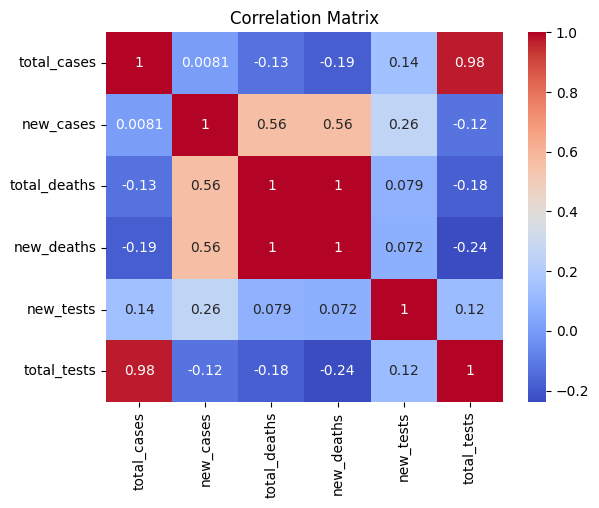

In [126]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show()

In [ ]:
"""

Here I devided the dataset into two group: new cases before January 1 2021 and
new cases after January 1 2021.
After performing the T-test I got T-statistics and P-value
- The T-statistic suggests there is a difference between the means of the two groups.
- The P-value (0.133) is greater than 0.05, indicating that the difference is not 
  statistically significant at the 5% significance level.
  
"""

In [127]:
comparison_date = pd.to_datetime('2021-01-01')

In [128]:
group1 = df[df['date'] < comparison_date]['new_cases']
group2 = df[df['date'] >= comparison_date]['new_cases']

In [132]:
t_stat, p_value = stats.ttest_ind(group1, group2)
print("*"*80)
print(f'T-Statistic: {t_stat}, \nP-Value: {p_value}')
print("*"*80)

********************************************************************************
T-Statistic: 1.504267441108321, 
P-Value: 0.13321715357058814
********************************************************************************


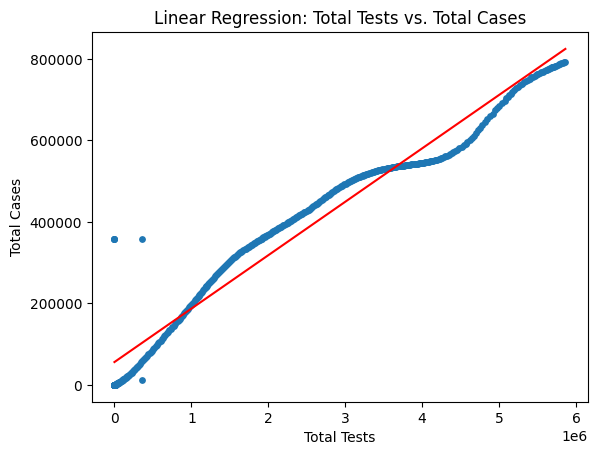

In [60]:
# linear regression test
X = df[['total_tests']] 
y = df['total_cases'] 
model = LinearRegression() 
model.fit(X, y) 
predictions = model.predict(X) 
plt.scatter(X, y, s=15) 
plt.plot(X, predictions, color='red') 
plt.title('Linear Regression: Total Tests vs. Total Cases') 
plt.xlabel('Total Tests') 
plt.ylabel('Total Cases')
plt.show()

In [ ]:
"""
 This graph show a positive correlation between the total number of tests and the total number of cases.
 This means that as the number of tests increases, the number of detected cases also tends to increase.
"""